   Unnamed: 0          id             date     price  bedrooms  bathrooms  \
0           0  7129300520  20141013T000000  221900.0       3.0       1.00   
1           1  6414100192  20141209T000000  538000.0       3.0       2.25   
2           2  5631500400  20150225T000000  180000.0       2.0       1.00   
3           3  2487200875  20141209T000000  604000.0       4.0       3.00   
4           4  1954400510  20150218T000000  510000.0       3.0       2.00   

   sqft_living  sqft_lot  floors  waterfront  ...  grade  sqft_above  \
0         1180      5650     1.0           0  ...      7        1180   
1         2570      7242     2.0           0  ...      7        2170   
2          770     10000     1.0           0  ...      6         770   
3         1960      5000     1.0           0  ...      7        1050   
4         1680      8080     1.0           0  ...      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955       

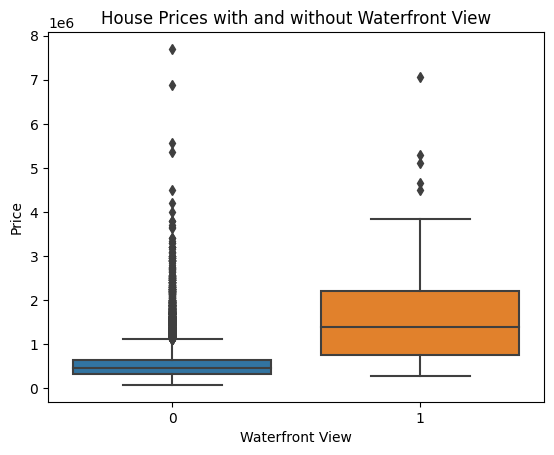

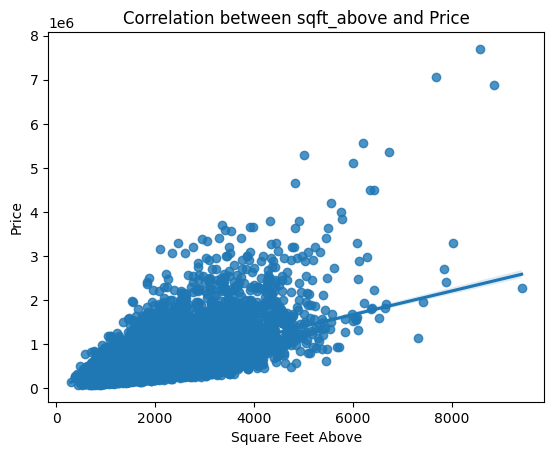

R-squared score: 0.4928532179037931
R-squared score: 0.4928532179037931
R-squared score: 0.6576950629068081
done
number of test samples: 3242
number of training samples: 18371
R-squared score on the test data: 0.6613982983090936
R-squared score on the test data with second-order polynomial features: 0.7000720074799736


In [29]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import piplite
await piplite.install(['pandas','matplotlib','scikit-learn','seaborn', 'numpy'])

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
            
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

await download(file_name, "kc_house_data_NaN.csv")
file_name="kc_house_data_NaN.csv"

df = pd.read_csv(file_name)
print(df.head())

df.head()

data_types = df.dtypes
print(data_types)

df.describe()

df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

summary = df.describe()

print(summary)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

floors_counts = df['floors'].value_counts()

floors_counts_df = floors_counts.to_frame()

print(floors_counts_df)

sns.boxplot(x="waterfront", y="price", data=df)

plt.xlabel("Waterfront View")
plt.ylabel("Price")
plt.title("House Prices with and without Waterfront View")

plt.show()

sns.regplot(x="sqft_above", y="price", data=df)

plt.xlabel("Square Feet Above")
plt.ylabel("Price")
plt.title("Correlation between sqft_above and Price")

plt.show()

df.corr()['price'].sort_values()

X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

from sklearn.metrics import r2_score

model = LinearRegression()

X = df[['sqft_living']]
y = df['price']

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print("R-squared score:", r2)

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

model = LinearRegression()

X = df[['sqft_living']]
y = df['price']

model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)

print("R-squared score:", r2)

Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

X = df[features]
y = df['price']

pipeline = Pipeline([
    ('regression', LinearRegression())
])

pipeline.fit(X, y)

y_pred = pipeline.predict(X)

r2 = r2_score(y, y_pred)

print("R-squared score:", r2)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

r2_test = r2_score(y_test, y_pred)

print("R-squared score on the test data:", r2_test)

from sklearn.preprocessing import PolynomialFeatures

X = df[features]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

X_test_poly = poly.transform(X_test)

ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

y_pred = ridge_model.predict(X_test_poly)

r2_test = r2_score(y_test, y_pred)

print("R-squared score on the test data with second-order polynomial features:", r2_test)